Epoch 1/30
3/3 [==============================] - 18s 5s/step - loss: 1.2191 - accuracy: 0.5946 - val_loss: 2.3482 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 14s 4s/step - loss: 0.7372 - accuracy: 0.6396 - val_loss: 0.8978 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 13s 4s/step - loss: 0.6346 - accuracy: 0.7207 - val_loss: 0.8472 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 14s 5s/step - loss: 0.5785 - accuracy: 0.7297 - val_loss: 0.7451 - val_accuracy: 0.5357
Epoch 5/30
3/3 [==============================] - 14s 4s/step - loss: 0.4761 - accuracy: 0.7297 - val_loss: 0.7426 - val_accuracy: 0.5357
Epoch 6/30
3/3 [==============================] - 13s 4s/step - loss: 0.4875 - accuracy: 0.7748 - val_loss: 0.8261 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 14s 5s/step - loss: 0.5263 - accuracy: 0.7568 - val_loss: 0.9236 - val_accuracy: 0.5000
Epoch 8/30
3/3 [==================

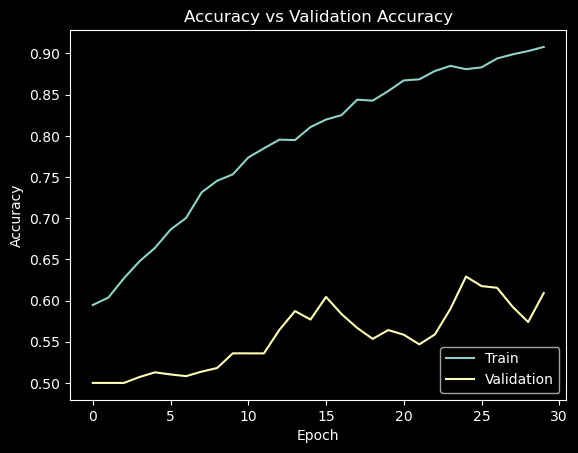

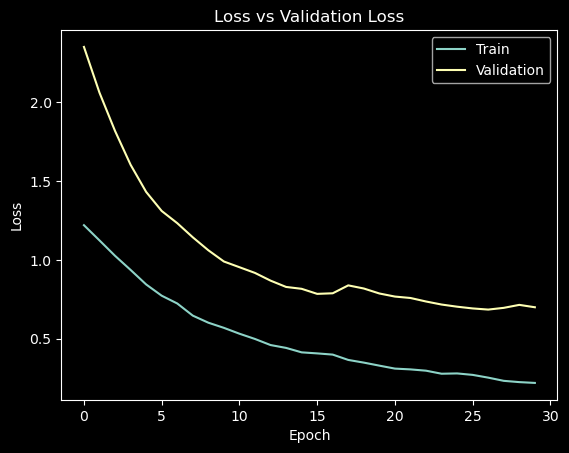

In [4]:
# import
import os
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, Dropout, Dense, MaxPooling2D
from keras.optimizers import Adamax
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# Data loading and preprocessing

# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r"C:\Users\Ramachandra\OneDrive\Desktop\madhu madam\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"C:\Users\Ramachandra\OneDrive\Desktop\madhu madam\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        
data = np.array(data)
data.shape
result = np.array(result)
result = result.reshape(139,2)

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model definition

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='Same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Model compilation
model.compile(loss="categorical_crossentropy", optimizer=Adamax(), metrics=['accuracy'])

# Model training
history = model.fit(x_train, y_train, epochs=30, batch_size=40, verbose=1, validation_data=(x_test, y_test))

# Define a function for moving average
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Plotting accuracy vs validation accuracy with moving average
plt.plot(smooth_curve(history.history['accuracy']), label='Train')
plt.plot(smooth_curve(history.history['val_accuracy']), label='Validation')
plt.title('Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plotting loss vs validation loss with moving average
plt.plot(smooth_curve(history.history['loss']), label='Train')
plt.plot(smooth_curve(history.history['val_loss']), label='Validation')
plt.title('Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
